In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
crime19 = gpd.read_file('data/nypd_complaint_2019_geo.geojson')
crime20 = gpd.read_file('data/nypd_complaint_2020_geo.geojson')


In [3]:
crime19

,boro_cd,shape_area,shape_leng,case_num,geometry
0,101,42689119.0133,74168.5878924,5802,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,102,37689205.9401,34130.5952768,8060,"POLYGON ((-73.99684 40.73736, -73.99362 40.736..."
2,103,46879779.2986,30695.6409632,10309,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
3,104,49311715.1126,67623.6699012,11345,"POLYGON ((-73.99394 40.77318, -73.99370 40.773..."
4,105,43790329.8699,35288.1885095,15522,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
...,...,...,...,...,...
66,502,592715674.432,143044.989836,4847,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ..."
67,503,599053419.389,193564.186317,3286,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ..."
68,595,54734567.3489,110147.254437,40,"MULTIPOLYGON (((-74.11834 40.55046, -74.11676 ..."
69,203,44803080.7253,33500.8967412,7888,"POLYGON ((-73.88072 40.83752, -73.88074 40.837..."


<IPython.core.display.Javascript object>


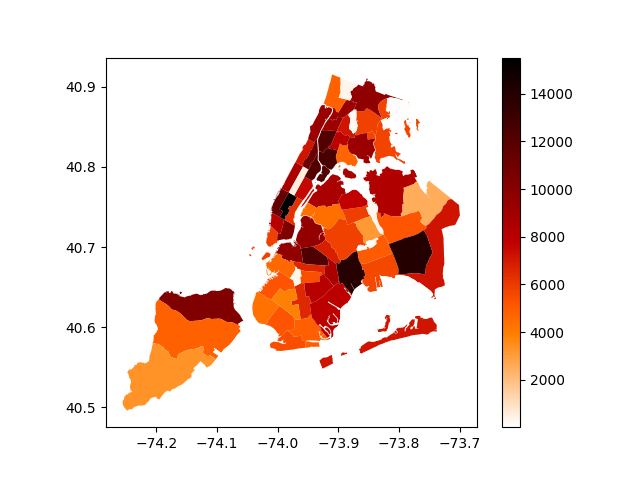

<AxesSubplot:>

In [4]:
crime19.plot(column='case_num', legend=True, cmap='gist_heat_r')

<IPython.core.display.Javascript object>


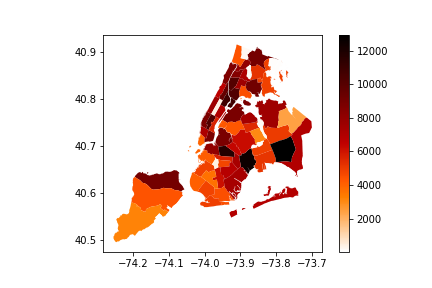

<AxesSubplot:>

In [30]:
crime20.plot(column='case_num', legend=True, cmap='gist_heat_r', missing_kwds={
    "color": "lightgrey",
    "edgecolor": "red",
    "hatch": "///",
    "label": "Missing values"})

## Relative Crime Index
Since the data is not comprehensive(there are approximate 950,000 crimes for year 2019 and 2020), we cannot directly compare numbers between this two dataframe. Thus, we use relative crime index instead, which is RCI = case_num / mean(case_num).

In [6]:
mean20 = crime20['case_num'].mean()
crime20['RCI'] = crime20['case_num'] / mean20
crime20['RCI']

0     0.699789
1     1.248045
2     1.546025
3     1.537431
4     1.791390
        ...   
66    0.767663
67    0.556850
68    0.005963
69    1.335738
70    1.606709
Name: RCI, Length: 71, dtype: float64

In [7]:
mean19 = crime19['case_num'].mean()
crime19['RCI'] = crime19['case_num'] / mean19
crime19['RCI']

0     0.913522
1     1.269044
2     1.623148
3     1.786266
4     2.443932
        ...   
66    0.763158
67    0.517379
68    0.006298
69    1.241962
70    1.454047
Name: RCI, Length: 71, dtype: float64

## Weighted Difference of RCI
variation * weight. For districts with a few crime incidents, a small increasing in total number of crimes will lead to dramatic increasing on RCI, and for ones with lots crime incidents, a small difference on RCI actually means huge increasing or decreasing. Therefore, we multiply the difference and mean of number of crime incidents of two years to get our weighted differences of RCI.

In [35]:
RCI_diff = crime20[['geometry']]
RCI_diff['diff'] = (crime20['RCI'] - crime19['RCI']) * (crime19['RCI'] + crime20['RCI']) / 2

C:\Users\zegan\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<IPython.core.display.Javascript object>


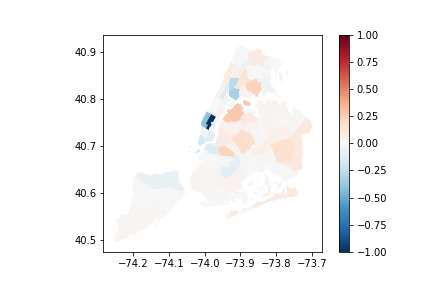

<AxesSubplot:>

In [36]:
norm = mpl.colors.Normalize(vmin=-1.,vmax=1.)
RCI_diff.plot(column='diff', legend=True, cmap='RdBu_r', norm=norm)

It seems that Manhattan' weighted CRI decreased significantly, this might due to the "shut down"

# Covid-19

In [43]:
covid = gpd.read_file('data/covid_geo.geojson')
covid['RCI'] = crime20['RCI']
covid

,boro_cd,shape_area,shape_leng,case_num,test_num,pop_deno,death_num,geometry,RCI
0,101,42689119.0133,74168.5878924,4274,62339,88700,96,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",0.699789
1,102,37689205.9401,34130.5952768,2584,39300,53488,45,"POLYGON ((-73.99684 40.73736, -73.99362 40.736...",1.248045
2,103,46879779.2986,30695.6409632,11170,122724,186450,403,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",1.546025
3,104,49311715.1126,67623.6699012,8069,112801,159912,217,"POLYGON ((-73.99394 40.77318, -73.99370 40.773...",1.537431
4,105,43790329.8699,35288.1885095,0,0,0,0,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",1.791390
...,...,...,...,...,...,...,...,...,...
66,502,592715674.432,143044.989836,19955,110714,177265,695,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ...",0.767663
67,503,599053419.389,193564.186317,22539,122464,191529,469,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ...",0.556850
68,595,54734567.3489,110147.254437,0,0,0,0,"MULTIPOLYGON (((-74.11834 40.55046, -74.11676 ...",0.005963
69,203,44803080.7253,33500.8967412,7499,51735,93192,339,"POLYGON ((-73.88072 40.83752, -73.88074 40.837...",1.335738


In [70]:
covid = covid[covid.pop_deno != 0]
covid['pos_rate'] = covid['case_num'] / covid['pop_deno']
covid['death_rate'] = covid['death_num'] / covid['pop_deno']
pop_mean = covid['pop_deno'].mean()
covid['RCI_rate'] = covid['RCI'] * (covid['pop_deno'] / pop_mean)
covid['RCI_diff'] = RCI_diff['diff'] 
covid

,boro_cd,shape_area,shape_leng,case_num,test_num,pop_deno,death_num,geometry,RCI,pos_rate,RCI_rate,death_rate,RCI_diff
0,101,42689119.0133,74168.5878924,4274,62339,88700,96,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",0.699789,0.048185,0.454177,0.001082,-0.172409
1,102,37689205.9401,34130.5952768,2584,39300,53488,45,"POLYGON ((-73.99684 40.73736, -73.99362 40.736...",1.248045,0.048310,0.488451,0.000841,-0.026428
2,103,46879779.2986,30695.6409632,11170,122724,186450,403,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",1.546025,0.059909,2.109177,0.002161,-0.122207
3,104,49311715.1126,67623.6699012,8069,112801,159912,217,"POLYGON ((-73.99394 40.77318, -73.99370 40.773...",1.537431,0.050459,1.798916,0.001357,-0.413525
5,106,38732664.3228,43387.541113,6534,97395,130774,164,"MULTIPOLYGON (((-73.96128 40.73016, -73.96128 ...",0.992683,0.049964,0.949874,0.001254,0.003397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,501,377253626.084,153873.506331,11430,68899,107341,309,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ...",1.585136,0.106483,1.244991,0.002879,-0.070705
66,502,592715674.432,143044.989836,19955,110714,177265,695,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ...",0.767663,0.112572,0.995699,0.003921,0.003448
67,503,599053419.389,193564.186317,22539,122464,191529,469,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ...",0.556850,0.117679,0.780381,0.002449,0.021200
69,203,44803080.7253,33500.8967412,7499,51735,93192,339,"POLYGON ((-73.88072 40.83752, -73.88074 40.837...",1.335738,0.080468,0.910823,0.003638,0.120862


<AxesSubplot:>

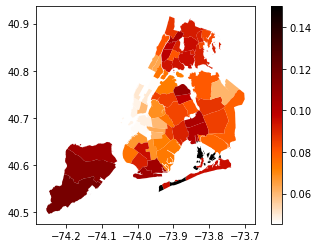

In [58]:
covid.plot(column='pos_rate', legend=True, cmap='gist_heat_r')

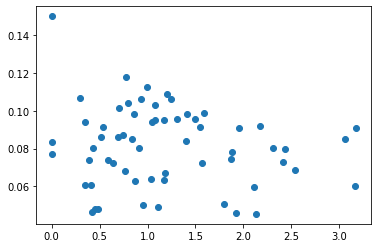

In [75]:
%matplotlib inline
plt.scatter(covid['RCI_rate'], covid['pos_rate'])

In [60]:
covid['RCI_rate'].corr(covid['pos_rate'])

-0.15550832959493469

## Death Rate 

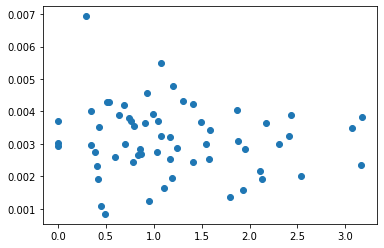

In [65]:
%matplotlib inline
plt.scatter(covid['RCI_rate'], covid['death_rate'])

In [68]:
covid['RCI_rate'].corr(covid['death_rate'])

-0.10780866018821411

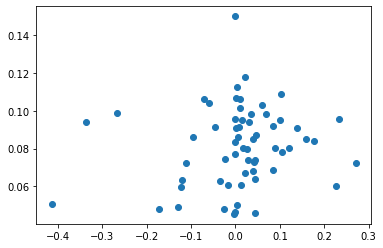

In [72]:
%matplotlib inline
plt.scatter(covid['RCI_diff'], covid['pos_rate'])

In [76]:
covid['RCI_diff'].corr(covid['pos_rate'])

0.14182192632661136

## Summary
There is a little correlation between covid and crimes in general.